In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
np.random.seed(42)
X=np.random.rand(100,1)-0.5
y=3*X[:,0]**2 + 0.05*np.random.rand(100)

In [65]:
X[0]

array([-0.12545988])

In [66]:
y

array([0.048792  , 0.64125068, 0.17718137, 0.05462902, 0.40034785,
       0.36748392, 0.60638943, 0.44003247, 0.04211265, 0.13373159,
       0.70400525, 0.67050687, 0.37803921, 0.28865238, 0.33537624,
       0.34427114, 0.1551469 , 0.01116715, 0.05852239, 0.15772293,
       0.07790522, 0.43469859, 0.14551172, 0.05908007, 0.0171863 ,
       0.26533138, 0.31148825, 0.04364439, 0.02596896, 0.64265905,
       0.05556824, 0.33676845, 0.57353362, 0.62137544, 0.69758506,
       0.30148692, 0.14046687, 0.52075413, 0.1200069 , 0.05933428,
       0.47668765, 0.0126589 , 0.67524457, 0.51767349, 0.18880332,
       0.08108483, 0.13683637, 0.02634213, 0.00911949, 0.31188247,
       0.70694246, 0.23907231, 0.5867227 , 0.49213855, 0.07803574,
       0.54603637, 0.54162204, 0.31536024, 0.63233653, 0.1279393 ,
       0.05556739, 0.18845909, 0.35588154, 0.08834756, 0.14848356,
       0.04723399, 0.40284524, 0.28329497, 0.54506022, 0.74072131,
       0.25622986, 0.27314611, 0.75912978, 0.30987253, 0.16062

In [67]:
df=pd.DataFrame()

In [68]:
df['X']=X.reshape(100)

In [69]:
df['y']=y

In [70]:
df.head()

,X,y
0,-0.125460,0.048792
1,0.450714,0.641251
2,0.231994,0.177181
3,0.098658,0.054629
4,-0.343981,0.400348


Text(0.5, 1.0, 'X vs Y')

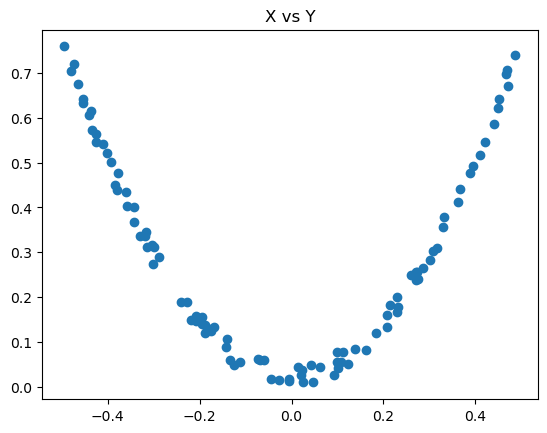

In [71]:
plt.scatter(df['X'],df['y'])
plt.title('X vs Y')

In [72]:
df['pred1']=df['y'].mean()

In [73]:
df.head()

,X,y,pred1
0,-0.125460,0.048792,0.290404
1,0.450714,0.641251,0.290404
2,0.231994,0.177181,0.290404
3,0.098658,0.054629,0.290404
4,-0.343981,0.400348,0.290404


In [74]:
df['resi1']=df['y']-df['pred1']

In [75]:
df.drop(['resi'],axis=1,inplace=True)

KeyError: "['resi'] not found in axis"

In [76]:
df.head() 

,X,y,pred1,resi1
0,-0.125460,0.048792,0.290404,-0.241612
1,0.450714,0.641251,0.290404,0.350847
2,0.231994,0.177181,0.290404,-0.113223
3,0.098658,0.054629,0.290404,-0.235775
4,-0.343981,0.400348,0.290404,0.109944


Text(0.5, 1.0, 'X vs resi1')

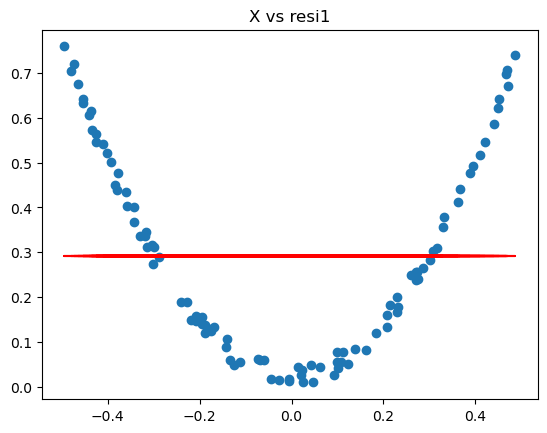

In [77]:
plt.scatter(df['X'],df['y'])
plt.plot(df['X'],df['pred1'],color='red')
plt.title('X vs resi1')

In [31]:
from sklearn.tree import DecisionTreeRegressor

In [78]:
tree1=DecisionTreeRegressor(max_leaf_nodes=8)

In [79]:
tree1.fit(df['X'].values.reshape(100,1),df['resi1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [37]:
from sklearn.tree import plot_tree

[Text(0.4090909090909091, 0.9166666666666666, 'X[0] <= -0.352\nsquared_error = 0.05\nsamples = 100\nvalue = -0.0'),
 Text(0.18181818181818182, 0.75, 'X[0] <= -0.436\nsquared_error = 0.01\nsamples = 19\nvalue = 0.278'),
 Text(0.09090909090909091, 0.5833333333333334, 'squared_error = 0.003\nsamples = 8\nvalue = 0.379'),
 Text(0.2727272727272727, 0.5833333333333334, 'squared_error = 0.003\nsamples = 11\nvalue = 0.205'),
 Text(0.6363636363636364, 0.75, 'X[0] <= 0.322\nsquared_error = 0.037\nsamples = 81\nvalue = -0.065'),
 Text(0.45454545454545453, 0.5833333333333334, 'X[0] <= -0.264\nsquared_error = 0.012\nsamples = 66\nvalue = -0.14'),
 Text(0.36363636363636365, 0.4166666666666667, 'squared_error = 0.001\nsamples = 10\nvalue = 0.038'),
 Text(0.5454545454545454, 0.4166666666666667, 'X[0] <= 0.211\nsquared_error = 0.007\nsamples = 56\nvalue = -0.171'),
 Text(0.45454545454545453, 0.25, 'X[0] <= -0.156\nsquared_error = 0.003\nsamples = 43\nvalue = -0.208'),
 Text(0.36363636363636365, 0.08333

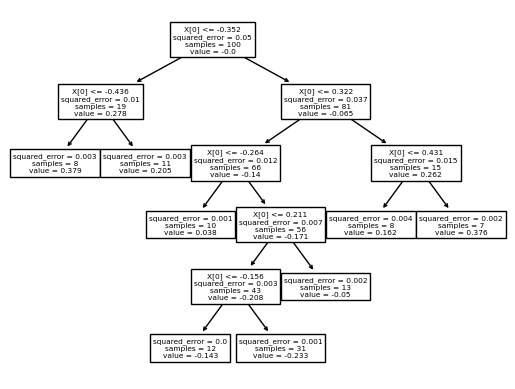

In [80]:
plot_tree(tree1)

In [81]:
# generative X_test
X_test=np.linspace(-0.5,0.5,500)

In [82]:
y_pred=0.290404+tree1.predict(X_test.reshape(500,1))

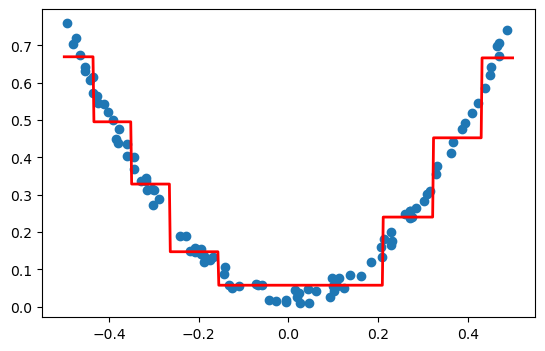

In [83]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test,y_pred,linewidth=2,color='red')
plt.scatter(df['X'],df['y'])

In [84]:
df['pred2']=0.290404+tree1.predict(df['X'].values.reshape(100,1))

In [85]:
df.head()

,X,y,pred1,resi1,pred2
0,-0.125460,0.048792,0.290404,-0.241612,0.057509
1,0.450714,0.641251,0.290404,0.350847,0.666444
2,0.231994,0.177181,0.290404,-0.113223,0.240031
3,0.098658,0.054629,0.290404,-0.235775,0.057509
4,-0.343981,0.400348,0.290404,0.109944,0.328478


In [86]:
df['resi2']=df['y']-df['pred2']

In [87]:
df.head()

,X,y,pred1,resi1,pred2,resi2
0,-0.125460,0.048792,0.290404,-0.241612,0.057509,-0.008717
1,0.450714,0.641251,0.290404,0.350847,0.666444,-0.025193
2,0.231994,0.177181,0.290404,-0.113223,0.240031,-0.062849
3,0.098658,0.054629,0.290404,-0.235775,0.057509,-0.002880
4,-0.343981,0.400348,0.290404,0.109944,0.328478,0.071870


In [88]:
tree2=DecisionTreeRegressor(max_leaf_nodes=8)

In [89]:
tree2.fit(df['X'].values.reshape(100,1),df['resi2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

[Text(0.6666666666666666, 0.9285714285714286, 'X[0] <= -0.47\nsquared_error = 0.002\nsamples = 100\nvalue = 0.0'),
 Text(0.5555555555555556, 0.7857142857142857, 'squared_error = 0.001\nsamples = 3\nvalue = 0.058'),
 Text(0.7777777777777778, 0.7857142857142857, 'X[0] <= 0.458\nsquared_error = 0.002\nsamples = 97\nvalue = -0.002'),
 Text(0.6666666666666666, 0.6428571428571429, 'X[0] <= 0.431\nsquared_error = 0.002\nsamples = 93\nvalue = -0.003'),
 Text(0.5555555555555556, 0.5, 'X[0] <= 0.391\nsquared_error = 0.002\nsamples = 90\nvalue = -0.002'),
 Text(0.4444444444444444, 0.35714285714285715, 'X[0] <= 0.322\nsquared_error = 0.002\nsamples = 87\nvalue = -0.004'),
 Text(0.2222222222222222, 0.21428571428571427, 'X[0] <= 0.28\nsquared_error = 0.002\nsamples = 82\nvalue = -0.002'),
 Text(0.1111111111111111, 0.07142857142857142, 'squared_error = 0.001\nsamples = 78\nvalue = -0.005'),
 Text(0.3333333333333333, 0.07142857142857142, 'squared_error = 0.0\nsamples = 4\nvalue = 0.05'),
 Text(0.66666

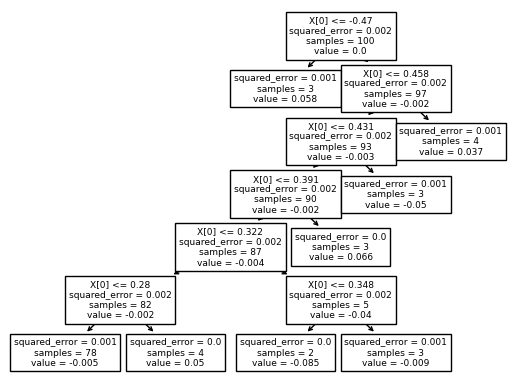

In [90]:
plot_tree(tree2)

In [91]:
y_pred1=0.290404+sum(regressor.predict(X_test.reshape(-1,1)) for regressor in [tree1,tree2])

Text(0.5, 1.0, 'X vs y')

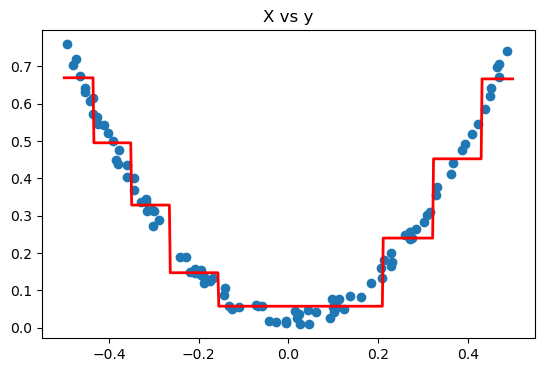

In [92]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test,y_pred,linewidth=2,color='red')
plt.scatter(df['X'],df['y'])
plt.title('X vs y')